In [290]:
library(eurostat)
library(ggplot2)
library(cowplot)

options(width=160, repr.plot.width=11, repr.plot.height=8)   

**<font color="red">Pozn.: Ve všech úkolech je vždy nutné uvést hypotézy a závěry testů! Toto je součástí cvičení. Řešený notebook obsahuje pouze doplněný R kód!</font>**

# Úkoly

V rámci tohoto cvičení budete na úkolech pracovat samostatně. Zaměříte se na data z Eurostatu, konkrétně na dataset s tímto popisem:

**Early leavers from education and training by sex and NUTS 2 regions**

Cílem bude provést základní šetření a ověřit několik tvrzení.

## Úkol 1.a

Nalezněte identifikátor (`code`) příslušný pro datový balík s výše uvedeným názvem. Nápověda: `search_eurostat()`.

In [291]:
search_eurostat(pattern='Early leavers from education and training by sex and NUTS 2 regions')

title,code,type,last update of data,last table structure change,data start,data end,values
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Early leavers from education and training by sex and NUTS 2 regions,edat_lfse_16,dataset,15.02.2023,15.02.2023,2000,2021,NA
Early leavers from education and training by sex and NUTS 2 regions,edat_lfse_16,dataset,15.02.2023,15.02.2023,2000,2021,NA
Early leavers from education and training by sex and NUTS 2 regions,edat_lfse_16,dataset,15.02.2023,15.02.2023,2000,2021,NA


## Úkol 1.b

Stáhněte datový balík a prozkoumejte jeho základní vlastnosti.

In [297]:
id <- "edat_lfse_16"
dat <- get_eurostat(id=id)

Reading cache file /tmp/Rtmpx6jXtv/eurostat/edat_lfse_16_date_code_FF.rds

Table  edat_lfse_16  read from cache file:  /tmp/Rtmpx6jXtv/eurostat/edat_lfse_16_date_code_FF.rds



## Úkol 2.a

Vyselektujte všechna historická data pro libovolný region soudržnosti NUTS2. Pokud možno tak, aby neobsahovala NA. Vhodným příkladem je CZ04 (reg. Severozápad, tj. Ústecký a Karlovarský kraj v jednom).

Upravte data do podoby data.frame, který bude mít 3 sloupce:
- date
- females - s procenty ze sloupce Values pro sex == F
- males - s procenty ze sloupce Values pro sex == M

In [246]:
# Toto není nejkratší cesta, ale data jsem si ještě trochu zkoumal...
data <- dat[dat$geo == "CZ04",]
data$sex <- as.factor(data$sex)
data$age <- as.factor(data$age)
summary(data)

     unit           sex        age         geo                 time                values     
 Length:60          F:20   Y18-24:60   Length:60          Min.   :2002-01-01   Min.   : 7.60  
 Class :character   M:20               Class :character   1st Qu.:2006-10-01   1st Qu.:11.20  
 Mode  :character   T:20               Mode  :character   Median :2011-07-02   Median :12.70  
                                                          Mean   :2011-07-02   Mean   :13.14  
                                                          3rd Qu.:2016-04-01   3rd Qu.:14.75  
                                                          Max.   :2021-01-01   Max.   :20.90  

In [247]:
females <- subset(data, sex=="F", select=c("time", "values"))
colnames(females) <- c("date", "females")
males <- subset(data, sex=="M", select=c("time", "values"))
colnames(males) <- c("date", "males")

In [248]:
edu_leavers <- merge(females, males)

In [249]:
edu_leavers

date,females,males
<date>,<dbl>,<dbl>
2002-01-01,13.3,9.3
2003-01-01,17.5,10.4
2004-01-01,14.7,11.1
2005-01-01,10.4,10.2
2006-01-01,10.4,11.0
2007-01-01,11.4,11.6
2008-01-01,15.7,13.6
2009-01-01,14.9,10.4
2010-01-01,13.0,9.7


## Úkol 2.b

Jedná se o časové řady, které mohou podléhat určitému časovému vývoj. My k datům budeme přistupovat naivně, jako kdyby měla stále stejnou distribuci. Zjistěte základní vlastnosti dat a diskutujte o nich. Zároveň okomentujte, zda by byl naivní přístup v praxi přijatelný.

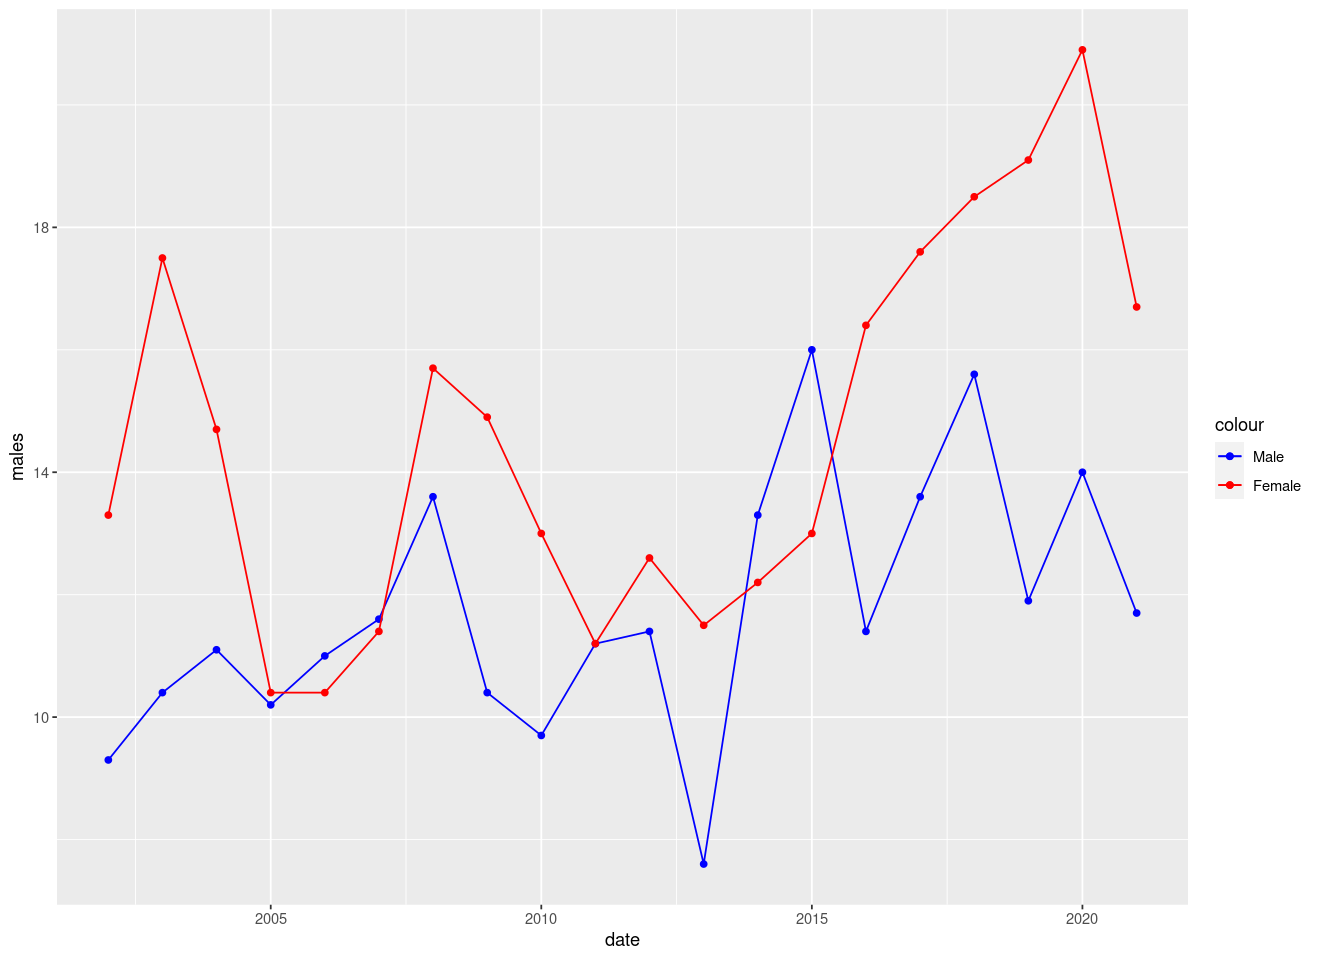

In [274]:
colors <- c("Male" = "blue", "Female" = "red")

ggplot(data=edu_leavers, aes(x=date)) +
    geom_path(aes(y=males, color="Male")) +
    geom_point(aes(y=males, color="Male")) +
    geom_path(aes(y=females, color="Female")) +
    geom_point(aes(y=females, color="Female")) +
    scale_color_manual(values = colors)

In [275]:
summary(edu_leavers)

      date               females          males      
 Min.   :2002-01-01   Min.   :10.40   Min.   : 7.60  
 1st Qu.:2006-10-01   1st Qu.:12.03   1st Qu.:10.40  
 Median :2011-07-02   Median :14.00   Median :11.40  
 Mean   :2011-07-02   Mean   :14.55   Mean   :11.75  
 3rd Qu.:2016-04-01   3rd Qu.:16.90   3rd Qu.:13.38  
 Max.   :2021-01-01   Max.   :20.90   Max.   :16.00  

## Úkol 3.a: Test střední hodnoty

Budeme i nadále naivně předpokládat, že data pro muže pocházejí ze stejného rozdělení a podobně data pro ženy rovněž ze stejného (potenciálně jiného) rozdělení.

Zaměřme se na následující závěr Eurostatu:

**In 2021, 11.4 % of young men and 7.9 % of young women in the EU were early leavers from education and training.**

Úkolem je otestovat, zda střední hodnoty obou výběrů těmto číslům odpovídají. Alternativu nastavme tak, aby potenciálně odrážela nepříjemnou - horší - skutečnost.

In [181]:
t.test(edu_leavers$females, mu=7.9, alternative="greater")


	One Sample t-test

data:  edu_leavers$females
t = 9.5377, df = 19, p-value = 5.609e-09
alternative hypothesis: true mean is greater than 7.9
95 percent confidence interval:
 13.34439      Inf
sample estimates:
mean of x 
    14.55 


In [199]:
t.test(edu_leavers$males, mu=11.4, alternative="greater")


	One Sample t-test

data:  edu_leavers$males
t = 0.7523, df = 19, p-value = 0.2305
alternative hypothesis: true mean is greater than 11.4
95 percent confidence interval:
 10.94554      Inf
sample estimates:
mean of x 
    11.75 


## Úkol 3.b

Pojďme se nyní zaměřit na následující cíl EU:

**The EU set an EU-level target stipulating that the share of early leavers from education and training should be less than 9 % by 2030.**

Máme otestovat, zda data vybraného regionu tuto mez splňují oproti alternativě, že situace je horší. Testovat budeme mediány.

In [295]:
wilcox.test(edu_leavers$females, mu=9, alternative="greater")

Warning message in wilcox.test.default(edu_leavers$females, mu = 9, alternative = "greater"):
“cannot compute exact p-value with ties”



	Wilcoxon signed rank test with continuity correction

data:  edu_leavers$females
V = 210, p-value = 4.771e-05
alternative hypothesis: true location is greater than 9


In [296]:
wilcox.test(edu_leavers$males, mu=9, alternative="greater")

Warning message in wilcox.test.default(edu_leavers$males, mu = 9, alternative = "greater"):
“cannot compute exact p-value with ties”



	Wilcoxon signed rank test with continuity correction

data:  edu_leavers$males
V = 205, p-value = 0.000101
alternative hypothesis: true location is greater than 9


## Úkol 4 

Cílem tohoto úkolu je otestovat, zda data mají pro obě pohlaví stejné střední hodnoty. Ideálně bychom chtěli použít základní dvouvýběrový t test, ale je třeba ověřit předpoklady pro jeho použití. Alternativu zvolte tak, aby odrážela váš odhad z dřívějších analýz.

In [278]:
var.test(edu_leavers$females, edu_leavers$males)


	F test to compare two variances

data:  edu_leavers$females and edu_leavers$males
F = 2.246, num df = 19, denom df = 19, p-value = 0.08583
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.8889773 5.6743013
sample estimates:
ratio of variances 
          2.245957 


In [299]:
t.test(edu_leavers$females, edu_leavers$males, var.equal=T, alternative="g")


	Two Sample t-test

data:  edu_leavers$females and edu_leavers$males
t = 3.3405, df = 38, p-value = 0.0009422
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 1.386833      Inf
sample estimates:
mean of x mean of y 
    14.55     11.75 


## Úkol 5

Nyní chceme otestovat, zda jsou distribuce shodné. Na základě parametrického testu jsme tak učinili výše, cvičně máme provést ještě test neparametrický. Alternativu opět uzpůsobme předběžným závěrům z dřívějších analýz.

In [280]:
wilcox.test(edu_leavers$females, edu_leavers$males, alternative="greater")

Warning message in wilcox.test.default(edu_leavers$females, edu_leavers$males, alternative = "greater"):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  edu_leavers$females and edu_leavers$males
W = 305, p-value = 0.002334
alternative hypothesis: true location shift is greater than 0


## Úkol 6

Máme ověřit, zda jsou data pro obě skupiny normálně rozdělená. Ověřte:
- vhodným statistickým testem
- vhodnou metodou posouzení odchylek od normality

Pokud by byl normální model přípustný, odhadněte jeho parametry.

In [281]:
shapiro.test(edu_leavers$females)


	Shapiro-Wilk normality test

data:  edu_leavers$females
W = 0.94585, p-value = 0.3085


In [282]:
shapiro.test(edu_leavers$males)


	Shapiro-Wilk normality test

data:  edu_leavers$males
W = 0.96064, p-value = 0.5568


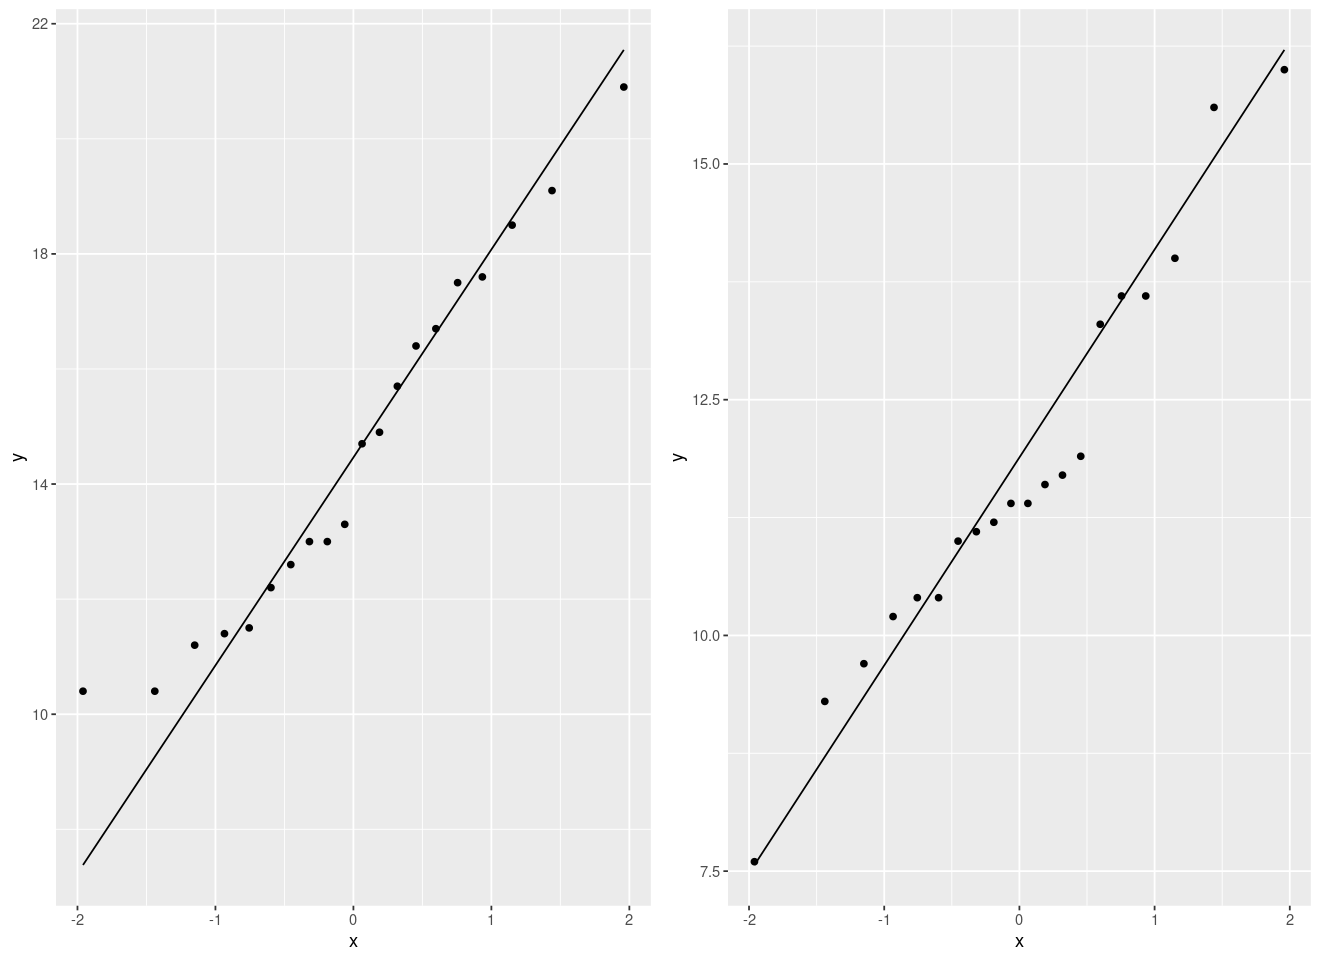

In [286]:
p1 <- ggplot(edu_leavers, aes(sample=females)) +
        stat_qq(distribution='qnorm', show.legend=T) +
        stat_qq_line(distribution='qnorm', show.legend=F)
p2 <- ggplot(edu_leavers, aes(sample=males)) +
        stat_qq(distribution='qnorm', show.legend=T) +
        stat_qq_line(distribution='qnorm', show.legend=F)
plot_grid(p1, p2, nrow=1)

In [287]:
paste0("Přípustný model pro ženy je N(", mean(edu_leavers$females), 
      ", ", var(edu_leavers$females), ")")

[1] "Přípustný model pro ženy je N(14.55, 9.72263157894737)"

In [288]:
paste0("Přípustný model pro muže je N(", mean(edu_leavers$males), 
      ", ", var(edu_leavers$males), ")")

[1] "Přípustný model pro muže je N(11.75, 4.32894736842105)"

## Úkol 7: Korelační analýza

Proveďte korelační analýzu, tj.
- podle povahy problému vyberte vhodný korelační koeficient
- odhadněte jeho hodnotu
- otestujte nekorelovanost

In [301]:
cor.test(edu_leavers$females, edu_leavers$males, method="pearson")


	Pearson's product-moment correlation

data:  edu_leavers$females and edu_leavers$males
t = 2.0605, df = 18, p-value = 0.05411
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.007008979  0.736923572
sample estimates:
      cor 
0.4368668 


---
---